In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler


In [52]:
df = pd.read_csv('/Users/mac/notebook_dir/data/digit-recognizer/numtrain.csv')

In [53]:
x_data = df.drop('label', axis=1, inplace = False)
t_data = df['label']

In [54]:
# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

In [55]:
# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test


In [56]:
# y_train_onehot = tf.one_hot(y_train, depth=10)
# y_test_onehot = tf.one_hot(y_test, depth=10)

In [57]:
model = Sequential()
model.add(Dense(256,
               activation = 'relu',
               kernel_initializer='he_uniform',
               input_shape=(x_data_train_norm.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128,
               activation = 'relu',
               kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,
               activation = 'softmax',
               kernel_initializer='he_uniform'))

In [58]:
model.compile(optimizer = Adam(learning_rate=1e-3),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_crossentropy'])

In [59]:
history = model.fit(x_data_train_norm,
                   t_data_train,
                   epochs=100,
                   verbose=1,
                   batch_size=128,
                   validation_split=0.3)

Train on 20580 samples, validate on 8820 samples
Epoch 1/100
20580/20580 [==============================] - 1s 41us/sample - loss: 0.6255 - sparse_categorical_crossentropy: 0.6255 - val_loss: 0.2565 - val_sparse_categorical_crossentropy: 0.2565
Epoch 2/100
20580/20580 [==============================] - 1s 27us/sample - loss: 0.2607 - sparse_categorical_crossentropy: 0.2607 - val_loss: 0.1867 - val_sparse_categorical_crossentropy: 0.1867
Epoch 3/100
20580/20580 [==============================] - 1s 31us/sample - loss: 0.1896 - sparse_categorical_crossentropy: 0.1896 - val_loss: 0.1657 - val_sparse_categorical_crossentropy: 0.1657
Epoch 4/100
20580/20580 [==============================] - 1s 26us/sample - loss: 0.1480 - sparse_categorical_crossentropy: 0.1480 - val_loss: 0.1384 - val_sparse_categorical_crossentropy: 0.1384
Epoch 5/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.1265 - sparse_categorical_crossentropy: 0.1265 - val_loss: 0.1363 - val_sparse_cate

20580/20580 [==============================] - 1s 25us/sample - loss: 0.0154 - sparse_categorical_crossentropy: 0.0154 - val_loss: 0.1403 - val_sparse_categorical_crossentropy: 0.1403
Epoch 43/100
20580/20580 [==============================] - 0s 24us/sample - loss: 0.0174 - sparse_categorical_crossentropy: 0.0174 - val_loss: 0.1324 - val_sparse_categorical_crossentropy: 0.1324
Epoch 44/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.0143 - sparse_categorical_crossentropy: 0.0143 - val_loss: 0.1462 - val_sparse_categorical_crossentropy: 0.1462
Epoch 45/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.0145 - sparse_categorical_crossentropy: 0.0145 - val_loss: 0.1427 - val_sparse_categorical_crossentropy: 0.1427
Epoch 46/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.0179 - sparse_categorical_crossentropy: 0.0179 - val_loss: 0.1420 - val_sparse_categorical_crossentropy: 0.1420
Epoch 47/100
20580/20580 [==

20580/20580 [==============================] - 1s 28us/sample - loss: 0.0075 - sparse_categorical_crossentropy: 0.0075 - val_loss: 0.1648 - val_sparse_categorical_crossentropy: 0.1648
Epoch 84/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.0106 - sparse_categorical_crossentropy: 0.0106 - val_loss: 0.1710 - val_sparse_categorical_crossentropy: 0.1710
Epoch 85/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.0096 - sparse_categorical_crossentropy: 0.0096 - val_loss: 0.1737 - val_sparse_categorical_crossentropy: 0.1737
Epoch 86/100
20580/20580 [==============================] - 1s 25us/sample - loss: 0.0120 - sparse_categorical_crossentropy: 0.0120 - val_loss: 0.1660 - val_sparse_categorical_crossentropy: 0.1660
Epoch 87/100
20580/20580 [==============================] - 1s 26us/sample - loss: 0.0100 - sparse_categorical_crossentropy: 0.0100 - val_loss: 0.1729 - val_sparse_categorical_crossentropy: 0.1729
Epoch 88/100
20580/20580 [==

In [63]:
result = np.argmax(model.predict(x_data_test_norm), axis=1)
print(classification_report(t_data_test, result))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1242
           1       0.98      0.99      0.98      1429
           2       0.97      0.98      0.97      1276
           3       0.97      0.96      0.97      1298
           4       0.98      0.97      0.98      1236
           5       0.97      0.97      0.97      1119
           6       0.97      0.99      0.98      1243
           7       0.98      0.97      0.98      1334
           8       0.96      0.96      0.96      1204
           9       0.97      0.97      0.97      1219

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



dict_keys(['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy'])


KeyError: 'val_sparse_categorical_accuracy'

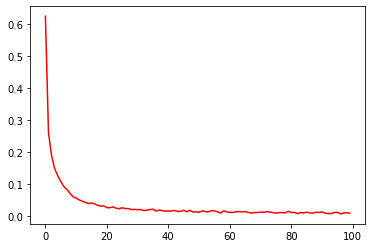

In [65]:
import matplotlib.pyplot as plt

print (history.history.keys())
plt.plot(history.history['sparse_categorical_crossentropy'], color = 'r')
plt.plot(history.history['val_sparse_categorical_accuracy'], color = 'b')
plt.show()